<a href="https://colab.research.google.com/github/Faiz-Nadeem/Deepfake-Image-Classification/blob/main/Deepfake_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!ls -l ~/.kaggle/

total 4
-rw-r--r-- 1 root root 66 Mar  3 13:09 kaggle.json


In [4]:
!ls -ld ~/.kaggle/

drwxr-xr-x 2 root root 4096 Mar  3 13:09 /root/.kaggle/


In [5]:
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces

100% 3.74G/3.75G [00:38<00:00, 65.0MB/s]
100% 3.75G/3.75G [00:38<00:00, 104MB/s] 


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/140k-real-and-fake-faces.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/real_vs_fake/real-vs-fake/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

#batch size determines how many images are processed in each iteration during training or validation

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/real_vs_fake/real-vs-fake/test',
    labels='inferred',
    label_mode = 'int',  # assign int to images ---fake --0 and real-----1
    batch_size=32,     #generators---batch ---divisions   "" batch size determines how many samples are processed in each iteration
    image_size=(256,256)  #assigning same size to every image or dimension of image
)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [9]:
#normalization(scaling)
def process(image,label):
  image =tf.cast(image/255. ,tf.float32)
  return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [10]:
#creating cnn model
# three layers
model = Sequential()  # layer formation

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#32---filters, kernel_size means filter size
#kernel-size 3,3  ----- filter grid
#The input shape is (256, 256, 3), representing a 256x256 image with three color channels (RGB).

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#64---filters
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
#decision making
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
# 128 and 64 representing images or neurons which are helping in decision making whether the image is of cat or dog
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
#model execute

history= model.fit(train_dataset,epochs=8,validation_data=validation_dataset)

Epoch 1/8
3125/3125 [==============================] - 335s 104ms/step - loss: 0.5423 - accuracy: 0.7821 - val_loss: 0.2243 - val_accuracy: 0.9088
Epoch 2/8
3125/3125 [==============================] - 303s 97ms/step - loss: 0.1497 - accuracy: 0.9422 - val_loss: 0.1934 - val_accuracy: 0.9226
Epoch 3/8
3125/3125 [==============================] - 305s 97ms/step - loss: 0.0820 - accuracy: 0.9709 - val_loss: 0.0752 - val_accuracy: 0.9736
Epoch 4/8
3125/3125 [==============================] - 304s 97ms/step - loss: 0.0588 - accuracy: 0.9801 - val_loss: 0.1642 - val_accuracy: 0.9622
Epoch 5/8
3125/3125 [==============================] - 307s 98ms/step - loss: 0.0408 - accuracy: 0.9862 - val_loss: 0.0710 - val_accuracy: 0.9753
Epoch 6/8
3125/3125 [==============================] - 327s 104ms/step - loss: 0.0368 - accuracy: 0.9877 - val_loss: 0.1103 - val_accuracy: 0.9609
Epoch 7/8
3125/3125 [==============================] - 303s 97ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0701

In [13]:
#model.save('/')

In [14]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [15]:
# Assuming 'model' is your trained model
#model.save('/content/gdrive/My Drive/model.h5')

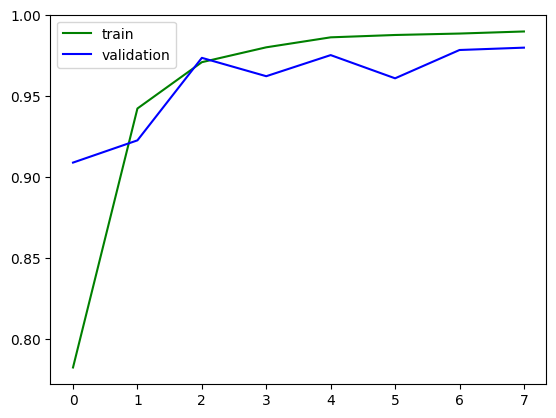

In [18]:
import matplotlib.pyplot as mplot
mplot.plot(history.history['accuracy'],color='green',label='train')
mplot.plot(history.history['val_accuracy'],color='blue',label='validation')
mplot.legend()
mplot.show()

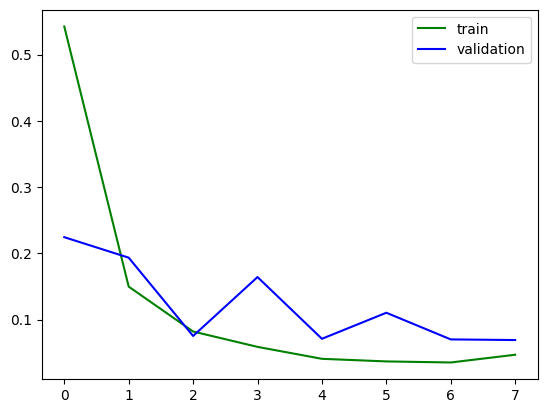

In [19]:
mplot.plot(history.history['loss'],color='green',label='train')
mplot.plot(history.history['val_loss'],color='blue',label='validation')
mplot.legend()
mplot.show()

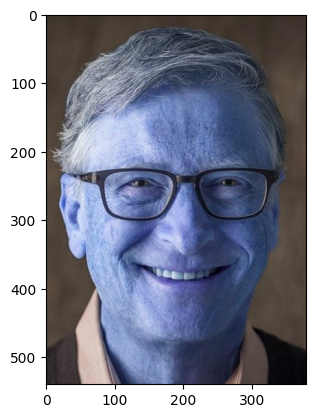

In [43]:
import cv2
test_img = cv2.imread('/content/real1.jpg')
mplot.imshow(test_img)

In [44]:
test_img.shape

(540, 379, 3)

In [45]:
test_img= cv2.resize(test_img,(256,256))

In [46]:
test_input= test_img.reshape((1,256,256,3))

In [47]:
model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)

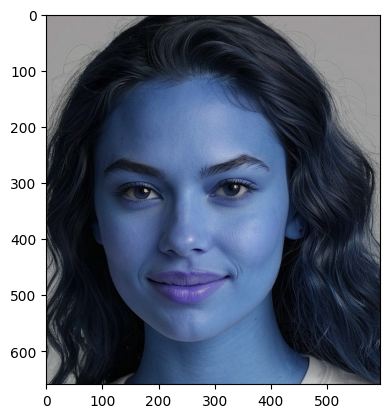

In [34]:
test_img= cv2.imread('/content/fake2.jpg')
mplot.imshow(test_img)

In [35]:
test_img.shape

(659, 596, 3)

In [36]:
test_img= cv2.resize(test_img,(256,256))
test_input2= test_img.reshape((1,256,256,3))

In [37]:
model.predict(test_input2)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

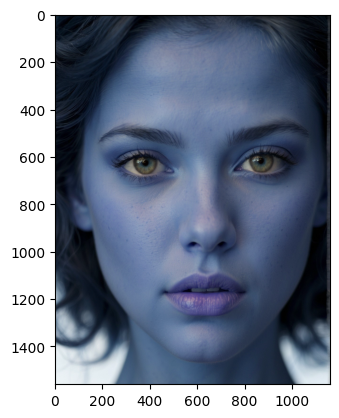

In [50]:
import cv2
test_img = cv2.imread('/content/fake1.jpg')
mplot.imshow(test_img)

In [51]:
test_img.shape
test_img= cv2.resize(test_img,(256,256))
test_input2= test_img.reshape((1,256,256,3))
model.predict(test_input2)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)